# Simple Hyperparameters

In this notebook we show the effect of a select number of hyperparameters on the results of training of a neural network, using a simple problem for illustration.

## Imports

In [1]:
# Libraries needed to import for this example

import numpy as np                    # Basic numerical python library
import matplotlib.pyplot as plt       # Plotting library for python

import tensorflow as tf               # Google library for Deep Learning
import keras as kr                    # High-level API for Tensorflow

2024-09-29 17:48:48.564261: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Target function

We will use the following function: sin(x$^2$-y$^2$)

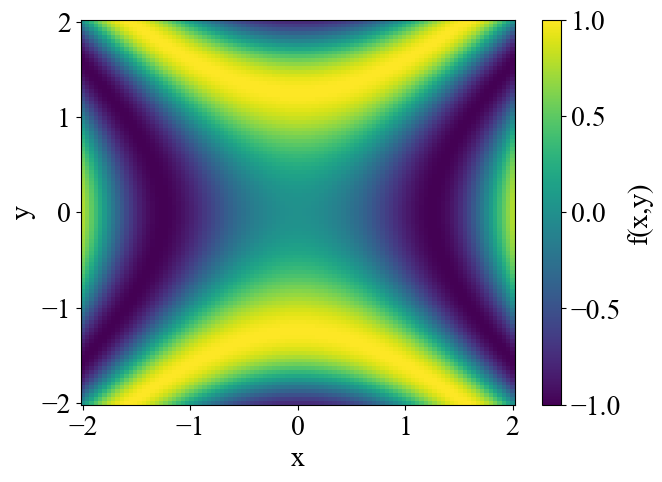

In [2]:
# Step 1: make a 2D mesh to plot it

N_points_plot = 100 # Number of points for each side in the mesh

x_mesh_plot = np.linspace(-2,2,N_points_plot)
y_mesh_plot = np.linspace(-2,2,N_points_plot)

plot_mesh = np.zeros((N_points_plot,N_points_plot))

# Step 2: obtain the function

for i in range(N_points_plot):
    
    for j in range(N_points_plot):
        
        plot_mesh[i,j] = np.sin(x_mesh_plot[i]**2-y_mesh_plot[j]**2)

# Step 3: plot the function

plt.rcParams['font.family'] = ['Times New Roman']
fig,axs = plt.subplots(1,1,figsize=(7,5))
pcm = axs.pcolormesh(x_mesh_plot,y_mesh_plot,plot_mesh,clim=(-1,1))
axs.set_ylabel('y', fontsize = 20)
axs.set_xlabel('x', fontsize = 20)
axs.tick_params(axis='both', labelsize = 20)
cbar = fig.colorbar(pcm)
cbar.ax.set_ylabel('f(x,y)', fontsize = 20)
cbar.ax.tick_params(labelsize = 20)
fig.savefig('DL_simple_2Dfunct.png', format='png', dpi=600)
plt.show()

## Network Architecture

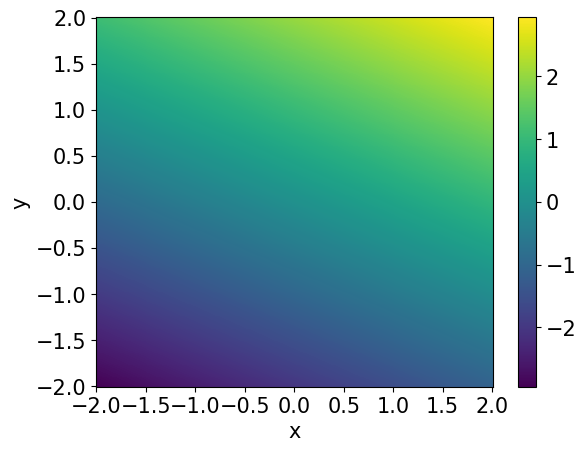

In [35]:
# Trial 1: no hidden layers

np.random.seed(42) # Fix the random seed for numpy
kr.utils.set_random_seed(42) # Fix the random seed for Keras

# Step 1: create the network

input_label = kr.Input((2,))
netl = kr.layers.Dense(1)(input_label) # Connected the layers one after the other

net = kr.Model(input_label,netl) # Create the full network

net.compile() # Compile the network

# Step 2: Check the reproduction of the network

N_points_net = 400 # Number of points for the graph on each axis

x_mesh_net = np.linspace(-2,2,N_points_net)
y_mesh_net = np.linspace(-2,2,N_points_net)

net_result = np.zeros((N_points_net,N_points_net))

for i in range(N_points_net):
    
    for j in range(N_points_net):
        
        input_try = np.reshape(np.array([x_mesh_net[i],y_mesh_net[j]]),(1,2))
        net_result[i,j] = np.reshape(net(input_try),(1,))
        

        
plt.rcParams['font.family'] = ['Times New Roman']
fig,axs = plt.subplots(1,1,figsize=(7,5))
pcm = axs.pcolormesh(x_mesh_net,y_mesh_net,net_result)
axs.set_ylabel('y', fontsize = 20)
axs.set_xlabel('x', fontsize = 20)
axs.tick_params(axis='both', labelsize = 20)
cbar = fig.colorbar(pcm)
cbar.ax.tick_params(labelsize = 20)
fig.savefig('DL_simple_size_0.png', format='png', dpi=600)
plt.show()

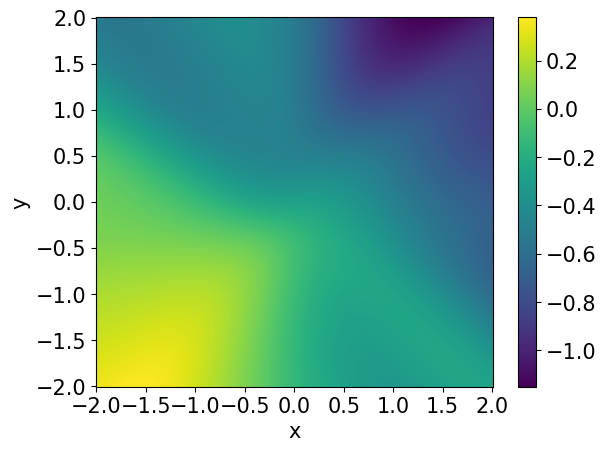

In [5]:
# Trial 2: single, small hidden layer

np.random.seed(42) # Fix the random seed for numpy
kr.utils.set_random_seed(42) # Fix the random seed for Keras

# Step 1: create the network

initializer_weights = kr.initializers.RandomUniform(minval=-4.0, maxval=4.0) # Uniform initialization for the weights
initializer_bias = kr.initializers.RandomUniform(minval=-1.0, maxval=1.0) # Uniform initialization for the biases

input_label = kr.Input((2,))
netl = kr.layers.Dense(30, activation = 'sigmoid', kernel_initializer=initializer_weights, bias_initializer=initializer_bias)(input_label)
netl = kr.layers.Dense(1)(netl) # Connected the layers one after the other

net = kr.Model(input_label,netl) # Create the full network

net.compile() # Compile the network

# Step 2: Check the reproduction of the network

N_points_net = 400

x_mesh_net = np.linspace(-2,2,N_points_net)
y_mesh_net = np.linspace(-2,2,N_points_net)

net_result = np.zeros((N_points_net,N_points_net))

for i in range(N_points_net):
    
    for j in range(N_points_net):
        
        input_try = np.reshape(np.array([x_mesh_net[i],y_mesh_net[j]]),(1,2))
        net_result[i,j] = np.reshape(net(input_try),(1,))

plt.rcParams['font.family'] = ['Times New Roman']
fig,axs = plt.subplots(1,1,figsize=(7,5))
pcm = axs.pcolormesh(x_mesh_net,y_mesh_net,net_result)
axs.set_ylabel('y', fontsize = 20)
axs.set_xlabel('x', fontsize = 20)
axs.tick_params(axis='both', labelsize = 20)
cbar = fig.colorbar(pcm)
cbar.ax.tick_params(labelsize = 20)
fig.savefig('DL_simple_size_1small.png', format='png', dpi=600)
plt.show()

2024-04-29 10:55:35.548342: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


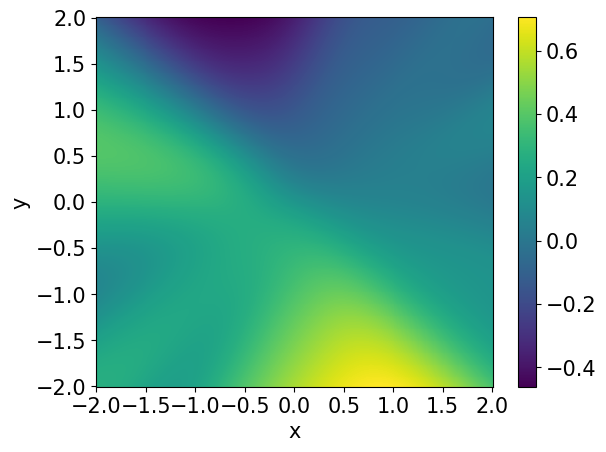

In [2]:
# Trial 3: single, big hidden layer

np.random.seed(42) # Fix the random seed for numpy
kr.utils.set_random_seed(42) # Fix the random seed for Keras

# Step 1: create the network

initializer_weights = kr.initializers.RandomUniform(minval=-4.0, maxval=4.0) # Uniform initialization for the weights
initializer_bias = kr.initializers.RandomUniform(minval=-1.0, maxval=1.0) # Uniform initialization for the biases

input_label = kr.Input((2,))
netl = kr.layers.Dense(10000, activation = 'sigmoid', kernel_initializer=initializer_weights, bias_initializer=initializer_bias)(input_label)
netl = kr.layers.Dense(1)(netl) # Connected the layers one after the other

net = kr.Model(input_label,netl) # Create the full network

net.compile() # Compile the network

# Step 2: Check the reproduction of the network

N_points_net = 400

x_mesh_net = np.linspace(-2,2,N_points_net)
y_mesh_net = np.linspace(-2,2,N_points_net)

net_result = np.zeros((N_points_net,N_points_net))

for i in range(N_points_net):
    
    for j in range(N_points_net):
        
        input_try = np.reshape(np.array([x_mesh_net[i],y_mesh_net[j]]),(1,2))
        net_result[i,j] = np.reshape(net(input_try),(1,))
        
plt.rcParams['font.family'] = ['Times New Roman']
fig,axs = plt.subplots(1,1,figsize=(7,5))
pcm = axs.pcolormesh(x_mesh_net,y_mesh_net,net_result)
axs.set_ylabel('y', fontsize = 20)
axs.set_xlabel('x', fontsize = 20)
axs.tick_params(axis='both', labelsize = 20)
cbar = fig.colorbar(pcm)
cbar.ax.tick_params(labelsize = 20)
fig.savefig('DL_simple_size_1big.png', format='png', dpi=600)
plt.show()

/home/a-work/miniconda3/envs/Deep-RL/lib/python3.11/site-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


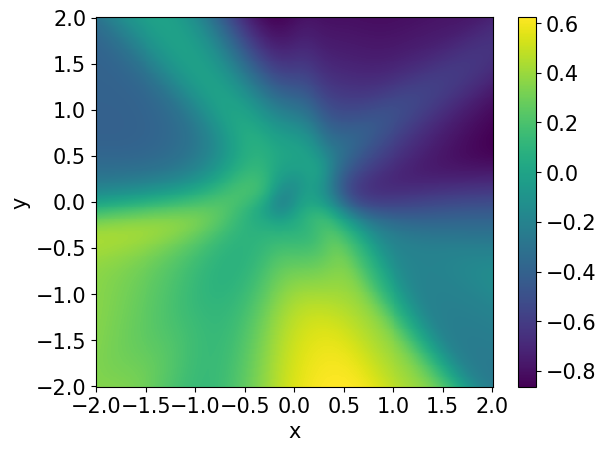

In [3]:
# Trial 4: 2 small hidden layers

np.random.seed(42) # Fix the random seed for numpy
kr.utils.set_random_seed(42) # Fix the random seed for Keras

# Step 1: create the network

initializer_weights = kr.initializers.RandomUniform(minval=-4.0, maxval=4.0) # Uniform initialization for the weights
initializer_bias = kr.initializers.RandomUniform(minval=-1.0, maxval=1.0) # Uniform initialization for the biases

input_label = kr.Input((2,))
netl = kr.layers.Dense(30, activation = 'sigmoid', kernel_initializer=initializer_weights, bias_initializer=initializer_bias)(input_label)
netl = kr.layers.Dense(30, activation = 'sigmoid', kernel_initializer=initializer_weights, bias_initializer=initializer_bias)(netl)
netl = kr.layers.Dense(1)(netl) # Connected the layers one after the other

net = kr.Model(input_label,netl) # Create the full network

net.compile() # Compile the network

# Step 2: Check the reproduction of the network

N_points_net = 400

x_mesh_net = np.linspace(-2,2,N_points_net)
y_mesh_net = np.linspace(-2,2,N_points_net)

net_result = np.zeros((N_points_net,N_points_net))

for i in range(N_points_net):
    
    for j in range(N_points_net):
        
        input_try = np.reshape(np.array([x_mesh_net[i],y_mesh_net[j]]),(1,2))
        net_result[i,j] = np.reshape(net(input_try),(1,))
        
plt.rcParams['font.family'] = ['Times New Roman']
fig,axs = plt.subplots(1,1,figsize=(7,5))
pcm = axs.pcolormesh(x_mesh_net,y_mesh_net,net_result)
axs.set_ylabel('y', fontsize = 20)
axs.set_xlabel('x', fontsize = 20)
axs.tick_params(axis='both', labelsize = 20)
cbar = fig.colorbar(pcm)
cbar.ax.tick_params(labelsize = 20)
fig.savefig('DL_simple_size_2small.png', format='png', dpi=600)
plt.show()

2024-04-29 13:28:19.300883: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
/home/a-work/miniconda3/envs/Deep-RL/lib/python3.11/site-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


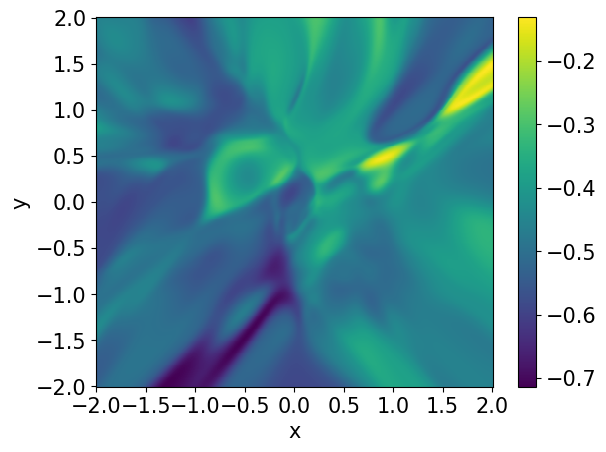

In [2]:
# Trial 5: many hidden layers

np.random.seed(42) # Fix the random seed for numpy
kr.utils.set_random_seed(42) # Fix the random seed for Keras

# Step 1: create the network

initializer_weights = kr.initializers.RandomUniform(minval=-2.0, maxval=2.0) # Uniform initialization for the weights
initializer_bias = kr.initializers.RandomUniform(minval=-1.0, maxval=1.0) # Uniform initialization for the biases

input_label = kr.Input((2,))
netl = kr.layers.Dense(100, activation = 'sigmoid', kernel_initializer=initializer_weights, bias_initializer=initializer_bias)(input_label)
netl = kr.layers.Dense(100, activation = 'sigmoid', kernel_initializer=initializer_weights, bias_initializer=initializer_bias)(netl)
netl = kr.layers.Dense(100, activation = 'sigmoid', kernel_initializer=initializer_weights, bias_initializer=initializer_bias)(netl)
netl = kr.layers.Dense(100, activation = 'sigmoid', kernel_initializer=initializer_weights, bias_initializer=initializer_bias)(netl)
netl = kr.layers.Dense(100, activation = 'sigmoid', kernel_initializer=initializer_weights, bias_initializer=initializer_bias)(netl)
netl = kr.layers.Dense(100, activation = 'sigmoid', kernel_initializer=initializer_weights, bias_initializer=initializer_bias)(netl)
netl = kr.layers.Dense(100, activation = 'sigmoid', kernel_initializer=initializer_weights, bias_initializer=initializer_bias)(netl)
netl = kr.layers.Dense(100, activation = 'sigmoid', kernel_initializer=initializer_weights, bias_initializer=initializer_bias)(netl)
netl = kr.layers.Dense(100, activation = 'sigmoid', kernel_initializer=initializer_weights, bias_initializer=initializer_bias)(netl)
netl = kr.layers.Dense(100, activation = 'sigmoid', kernel_initializer=initializer_weights, bias_initializer=initializer_bias)(netl)
netl = kr.layers.Dense(100, activation = 'sigmoid', kernel_initializer=initializer_weights, bias_initializer=initializer_bias)(netl)
netl = kr.layers.Dense(100, activation = 'sigmoid', kernel_initializer=initializer_weights, bias_initializer=initializer_bias)(netl)
netl = kr.layers.Dense(100, activation = 'sigmoid', kernel_initializer=initializer_weights, bias_initializer=initializer_bias)(netl)
netl = kr.layers.Dense(100, activation = 'sigmoid', kernel_initializer=initializer_weights, bias_initializer=initializer_bias)(netl)
netl = kr.layers.Dense(100, activation = 'sigmoid', kernel_initializer=initializer_weights, bias_initializer=initializer_bias)(netl)
netl = kr.layers.Dense(100, activation = 'sigmoid', kernel_initializer=initializer_weights, bias_initializer=initializer_bias)(netl)
netl = kr.layers.Dense(100, activation = 'sigmoid', kernel_initializer=initializer_weights, bias_initializer=initializer_bias)(netl)
netl = kr.layers.Dense(100, activation = 'sigmoid', kernel_initializer=initializer_weights, bias_initializer=initializer_bias)(netl)
netl = kr.layers.Dense(100, activation = 'sigmoid', kernel_initializer=initializer_weights, bias_initializer=initializer_bias)(netl)
netl = kr.layers.Dense(100, activation = 'sigmoid', kernel_initializer=initializer_weights, bias_initializer=initializer_bias)(netl)
netl = kr.layers.Dense(1)(netl) # Connected the layers one after the other

net = kr.Model(input_label,netl) # Create the full network

net.compile() # Compile the network

# Step 2: Check the reproduction of the network

N_points_net = 400

x_mesh_net = np.linspace(-2,2,N_points_net)
y_mesh_net = np.linspace(-2,2,N_points_net)

net_result = np.zeros((N_points_net,N_points_net))

for i in range(N_points_net):
    
    for j in range(N_points_net):
        
        input_try = np.reshape(np.array([x_mesh_net[i],y_mesh_net[j]]),(1,2))
        net_result[i,j] = np.reshape(net(input_try),(1,))
        
plt.rcParams['font.family'] = ['Times New Roman']
fig,axs = plt.subplots(1,1,figsize=(7,5))
pcm = axs.pcolormesh(x_mesh_net,y_mesh_net,net_result)
axs.set_ylabel('y', fontsize = 20)
axs.set_xlabel('x', fontsize = 20)
axs.tick_params(axis='both', labelsize = 20)
cbar = fig.colorbar(pcm)
cbar.ax.tick_params(labelsize = 20)
fig.savefig('DL_simple_size_many.png', format='png', dpi=600)
plt.show()

## Activation functions

In [3]:
# In this code we define many different activation functions

def step(x):
    
    result = 0
    
    if x >= 0:
        
        result = 1
        
    return result

def sign(x):
    
    result = -1
    
    if x >= 0:
        
        result = 1
        
    return result

def sigmoid(x):
    
    return 1/(1+np.exp(-x))

def hard_sigmoid(x):
    
    result = x/6+0.5
    
    if x >= 3:
        
        result = 1
        
    elif x <= -3:
        
        result = 0
        
    return result

def softsign(x):
    
    return x/(np.abs(x)+1)

def ReLU(x):
    
    return np.maximum(0,x)

def softplus(x):
    
    return np.log(np.exp(x)+1)

def Leaky_ReLU(x,a=0.2):
    
    result = a*x
    
    if x >= 0:
        
        result = x
        
    return result

def ELU(x,alpha=1.0):
    
    result = alpha*(np.exp(x)-1)
    
    if x >= 0:
        
        result = x
        
    return result

def SELU(x,alpha=1.67326324,lambdas=1.05070098):
    
    result = lambdas*alpha*(np.exp(x)-1)
    
    if x >= 0:
        
        result = lambdas*x
        
    return result

def Mish(x):
    
    return x * np.tanh(np.log(np.exp(x) + 1))

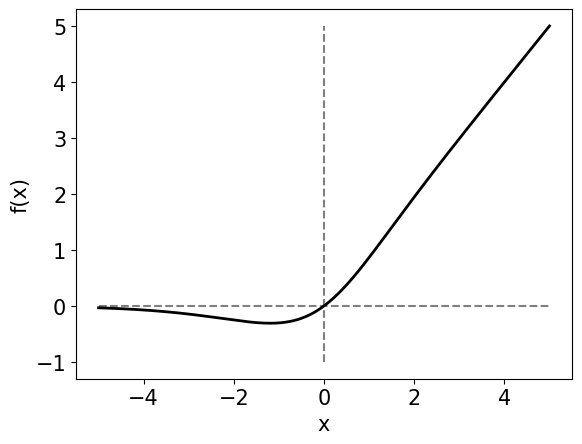

In [4]:
# In this code we plot many different activation functions

# Step 1: define the activation function we will use

activation = Mish

# Step 2: plot the chosen function

x_vector = np.linspace(-5,5,1000)

y_vector = np.zeros((x_vector.shape[0],))

for i in range(x_vector.shape[0]):
    
    y_vector[i] = activation(x_vector[i])

plt.rcParams['font.family'] = ['Times New Roman']
fig,axs = plt.subplots(1,1,figsize=(7,5))   
axs.plot(x_vector,y_vector,'k', linewidth = 2.0)
axs.set_xlabel('x', fontsize = 20)
axs.set_ylabel('f(x)', fontsize = 20)
axs.tick_params(axis='both', labelsize = 20)
axs.hlines(0,-5,5,'k', linestyle = 'dashed', alpha = 0.5)
axs.vlines(0,-1,5,'k', linestyle = 'dashed', alpha = 0.5)
#fig.savefig('DL_simple_acts.png', format='png', dpi=600)
plt.show()

/tmp/ipykernel_10541/1304732243.py:25: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  input_data[i*N_points_data+j] = x_mesh_data[i],y_mesh_data[j]


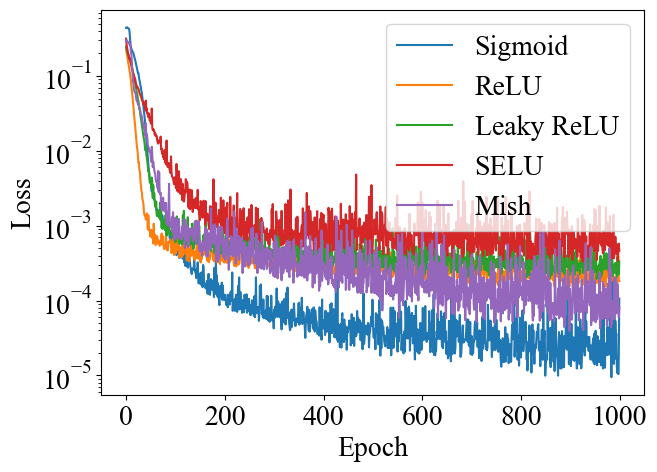

In [3]:
# We will make a network that maps 2 inputs (x,y) to 1 output (sin(x^2-y^2))

# We will use different activation functions to compare their efficiency 

np.random.seed(42) # Fix the random seed for numpy
kr.utils.set_random_seed(42) # Fix the random seed for Keras

# Step 1: obtain datasets

N_points_data = 100

x_mesh_data = np.reshape(np.linspace(-2,2,N_points_data),(N_points_data,1))
y_mesh_data = np.reshape(np.linspace(-2,2,N_points_data),(N_points_data,1))

input_data = np.zeros((N_points_data**2,2))
output_data = np.zeros((N_points_data**2,1))

input_data_rand = np.zeros((N_points_data**2,2))
output_data_rand = np.zeros((N_points_data**2,1))

for i in range(N_points_data):
    
    for j in range(N_points_data):
        
        input_data[i*N_points_data+j] = x_mesh_data[i],y_mesh_data[j]
        output_data[i*N_points_data+j] = np.sin(x_mesh_data[i]**2-y_mesh_data[j]**2)
        
random_index = np.linspace(0,N_points_data**2-1,N_points_data**2)
np.random.shuffle(random_index)

for i in range(N_points_data):
    
    for j in range(N_points_data):
        
        index_rand = int(random_index[i*N_points_data+j])
        
        input_data_rand[i*N_points_data+j] = input_data[index_rand]
        output_data_rand[i*N_points_data+j] = output_data[index_rand]

# Step 2: create the networks, one for each activation

# Sigmoid network

input_label_1 = kr.Input((2,))
netl_1 = kr.layers.Dense(50, activation = 'sigmoid')(input_label_1)
netl_1 = kr.layers.Dense(50, activation = 'sigmoid')(netl_1)
netl_1 = kr.layers.Dense(1)(netl_1) # Connected the layers one after the other

net_1 = kr.Model(input_label_1,netl_1) # Create the full network

opt_1 = tf.keras.optimizers.Adam(learning_rate=0.001) # Choose optimizer

net_1.compile(loss='mean_squared_error', optimizer=opt_1) # Compile the network

# ReLU network

input_label_2 = kr.Input((2,))
netl_2 = kr.layers.Dense(50, activation = 'relu')(input_label_2)
netl_2 = kr.layers.Dense(50, activation = 'relu')(netl_2)
netl_2 = kr.layers.Dense(1)(netl_2) # Connected the layers one after the other

net_2 = kr.Model(input_label_2,netl_2) # Create the full network

opt_2 = tf.keras.optimizers.Adam(learning_rate=0.0003) # Choose optimizer

net_2.compile(loss='mean_squared_error', optimizer=opt_2) # Compile the network

# Leaky ReLU network

input_label_3 = kr.Input((2,))
netl_3 = kr.layers.Dense(50, activation = 'leaky_relu')(input_label_3)
netl_3 = kr.layers.Dense(50, activation = 'leaky_relu')(netl_3)
netl_3 = kr.layers.Dense(1)(netl_3) # Connected the layers one after the other

net_3 = kr.Model(input_label_3,netl_3) # Create the full network

opt_3 = tf.keras.optimizers.Adam(learning_rate=0.0003) # Choose optimizer

net_3.compile(loss='mean_squared_error', optimizer=opt_3) # Compile the network

# SELU network

input_label_4 = kr.Input((2,))
netl_4 = kr.layers.Dense(50, activation = 'selu')(input_label_4)
netl_4 = kr.layers.Dense(50, activation = 'selu')(netl_4)
netl_4 = kr.layers.Dense(1)(netl_4) # Connected the layers one after the other

net_4 = kr.Model(input_label_4,netl_4) # Create the full network

opt_4 = tf.keras.optimizers.Adam(learning_rate=0.0003) # Choose optimizer

net_4.compile(loss='mean_squared_error', optimizer=opt_4) # Compile the network

# Mish network

## Mish Activation Function (for some reason, we have to define it ourselves)

def mish(x):
    
    return tf.keras.layers.Lambda(lambda x: x*tf.tanh(tf.math.log(tf.exp(x)+1)))(x)

input_label_5 = kr.Input((2,))
netl_5 = kr.layers.Dense(50, activation = mish)(input_label_5)
netl_5 = kr.layers.Dense(50, activation = mish)(netl_5)
netl_5 = kr.layers.Dense(1)(netl_5) # Connected the layers one after the other

net_5 = kr.Model(input_label_5,netl_5) # Create the full network

opt_5 = tf.keras.optimizers.Adam(learning_rate=0.001) # Choose optimizer

net_5.compile(loss='mean_squared_error', optimizer=opt_5) # Compile the network

# Step 3: train the networks

batch_size = 32
n_epochs = 1000
val_percentage = 0.2

net1 = net_1.fit(input_data_rand,output_data_rand,batch_size=batch_size, validation_split=val_percentage, epochs=n_epochs, verbose = 0)
loss_1 = net1.history['loss'] #recording of loss
val_loss_1 = net1.history['val_loss'] #recording of val_loss

net2 = net_2.fit(input_data_rand,output_data_rand,batch_size=batch_size, validation_split=val_percentage, epochs=n_epochs, verbose = 0)
loss_2 = net2.history['loss'] #recording of loss
val_loss_2 = net2.history['val_loss'] #recording of val_loss

net3 = net_3.fit(input_data_rand,output_data_rand,batch_size=batch_size, validation_split=val_percentage, epochs=n_epochs, verbose = 0)
loss_3 = net3.history['loss'] #recording of loss
val_loss_3 = net3.history['val_loss'] #recording of val_loss

net4 = net_4.fit(input_data_rand,output_data_rand,batch_size=batch_size, validation_split=val_percentage, epochs=n_epochs, verbose = 0)
loss_4 = net4.history['loss'] #recording of loss
val_loss_4 = net4.history['val_loss'] #recording of val_loss

net5 = net_5.fit(input_data_rand,output_data_rand,batch_size=batch_size, validation_split=val_percentage, epochs=n_epochs, verbose = 0)
loss_5 = net5.history['loss'] #recording of loss
val_loss_5 = net5.history['val_loss'] #recording of val_loss

# Step 4: plot the results

plt.rcParams['font.family'] = ['Times New Roman']
fig,axs = plt.subplots(1,1,figsize=(7,5))
axs.plot(val_loss_1)
axs.plot(val_loss_2)
axs.plot(val_loss_3)
axs.plot(val_loss_4)
axs.plot(val_loss_5)
axs.set_xlabel('Epoch', fontsize = 20)
axs.set_ylabel('Loss', fontsize = 20)
axs.set_yscale('log')
axs.tick_params(axis='both', labelsize = 20)
axs.legend(['Sigmoid', 'ReLU', 'Leaky ReLU', 'SELU', 'Mish'], loc='upper right', fontsize = 20)
fig.savefig('DL_simple_acts_1000.png', format='png', dpi=600)
plt.show()

## Cost functions

In [3]:
# In this code we define many different cost functions (assume y_true = 0)

def MSE(x):
    
    result = x**2
        
    return result

def MAE(x):
    
    result = np.abs(x)
        
    return result

def MAPE(x,y_true):
    
    result = 100*np.abs((x-y_true)/y_true)
        
    return result

def MSLE(x):
    
    result = np.log(x+1)**2
        
    return result

def Huber(x,delta=1.0):
    
    if np.abs(x) < delta:
        
        result = x**2/2
    
    else:
        
        result = np.abs(x)*delta - delta**2/2
        
    return result

def log_cosh(x):
    
    result = np.log(np.cosh(x))
    
    return result

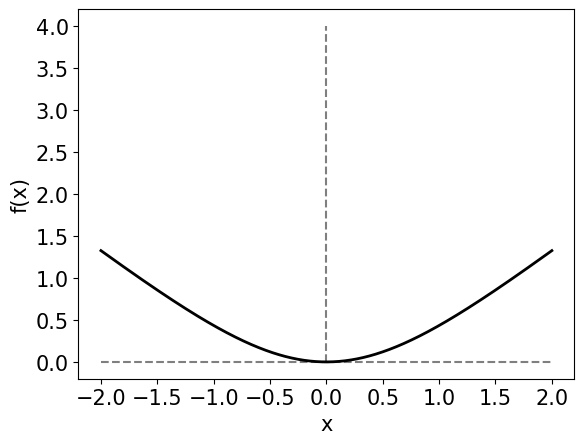

In [11]:
# In this code we plot different cost functions

# Step 1: define the cost function we will use

cost = log_cosh

# Step 2: plot the chosen function

x_vector = np.linspace(-2,2,1000)

y_vector = np.zeros((x_vector.shape[0],))

for i in range(x_vector.shape[0]):
    
    y_vector[i] = cost(x_vector[i])

plt.rcParams['font.family'] = ['Times New Roman']
fig,axs = plt.subplots(1,1,figsize=(7,5)) 

axs.plot(x_vector,y_vector,'k', linewidth = 2.0)
axs.set_xlabel('x', fontsize = 15)
axs.set_ylabel('f(x)', fontsize = 15)
axs.tick_params(axis='both', labelsize = 20)
axs.hlines(0,-2,2,'k', linestyle = 'dashed', alpha = 0.5)
axs.vlines(0,0,4,'k', linestyle = 'dashed', alpha = 0.5)
#fig.savefig('DL_simple_costs.png', format='png', dpi=600)
plt.show()

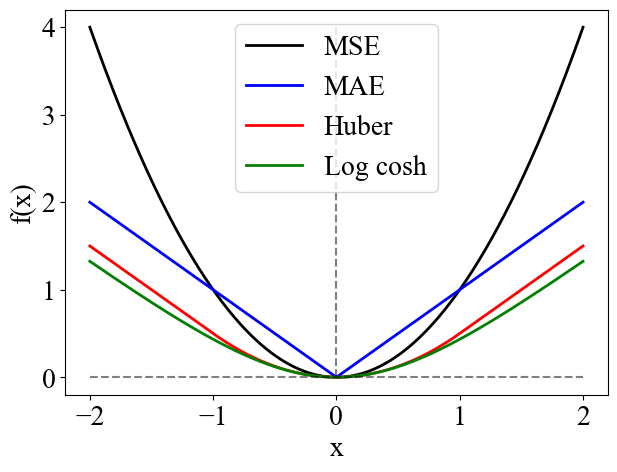

In [3]:
# In this code we compare different cost functions

def MSE(x):
    
    result = x**2
        
    return result

def MAE(x):
    
    result = np.abs(x)
        
    return result

def Huber(x,delta=1.0):
    
    if np.abs(x) < delta:
        
        result = x**2/2
    
    else:
        
        result = np.abs(x)*delta - delta**2/2
        
    return result

def log_cosh(x):
    
    result = np.log(np.cosh(x))
    
    return result

# Step 1: define the cost functions we will use

cost1 = MSE
cost2 = MAE
cost3 = Huber
cost4 = log_cosh

# Step 2: plot the chosen function

x_vector = np.linspace(-2,2,1000)

y_vector1 = np.zeros((x_vector.shape[0],))
y_vector2 = np.zeros((x_vector.shape[0],))
y_vector3 = np.zeros((x_vector.shape[0],))
y_vector4 = np.zeros((x_vector.shape[0],))

for i in range(x_vector.shape[0]):
    
    y_vector1[i] = cost1(x_vector[i])
    y_vector2[i] = cost2(x_vector[i])
    y_vector3[i] = cost3(x_vector[i])
    y_vector4[i] = cost4(x_vector[i])
    
plt.rcParams['font.family'] = ['Times New Roman']
fig,axs = plt.subplots(1,1,figsize=(7,5))
axs.plot(x_vector,y_vector1,'k', linewidth = 2.0)
axs.plot(x_vector,y_vector2,'b', linewidth = 2.0)
axs.plot(x_vector,y_vector3,'r', linewidth = 2.0)
axs.plot(x_vector,y_vector4,'g', linewidth = 2.0)
axs.set_ylabel('f(x)', fontsize = 20)
axs.set_xlabel('x', fontsize = 20)
axs.tick_params(axis='both', labelsize = 20)
axs.hlines(0,-2,2,'k', linestyle = 'dashed', alpha = 0.5)
axs.vlines(0,0,4,'k', linestyle = 'dashed', alpha = 0.5)
axs.legend(['MSE', 'MAE', 'Huber', 'Log cosh'], loc='upper center', fontsize = 20)
fig.savefig('DL_compare_costs.png', format='png', dpi=600)
plt.show()

## Optimizers

In [4]:
# In this code we define many different optimizers

def SGD(model,lr):
    
    opt = tf.keras.optimizers.SGD(learning_rate=lr) # Choose optimizer

    model.compile(loss='mean_squared_error', optimizer=opt) # Compile the network
    
    return None

def Momentum_opt(model,lr):
    
    opt = tf.keras.optimizers.SGD(learning_rate=lr, momentum=0.9) # Choose optimizer

    model.compile(loss='mean_squared_error', optimizer=opt) # Compile the network
    
    return None

def Nesterov(model,lr):
    
    opt = tf.keras.optimizers.SGD(learning_rate=lr, momentum=0.9, nesterov = True) # Choose optimizer

    model.compile(loss='mean_squared_error', optimizer=opt) # Compile the network
    
    return None

def Adagrad(model,lr):
    
    opt = tf.keras.optimizers.Adagrad(learning_rate=lr, epsilon = 1e-10) # Choose optimizer

    model.compile(loss='mean_squared_error', optimizer=opt) # Compile the network
    
    return None

def RMSProp(model,lr):
    
    opt = tf.keras.optimizers.RMSprop(learning_rate=lr, rho = 0.9) # Choose optimizer

    model.compile(loss='mean_squared_error', optimizer=opt) # Compile the network
    
    return None

def Adam(model,lr):
    
    opt = tf.keras.optimizers.Adam(learning_rate=lr, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-07) # Choose optimizer

    model.compile(loss='mean_squared_error', optimizer=opt) # Compile the network
    
    return None

/tmp/ipykernel_138745/479106653.py:25: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  input_data[i*N_points_data+j] = x_mesh_data[i],y_mesh_data[j]
2024-09-23 18:09:14.893281: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


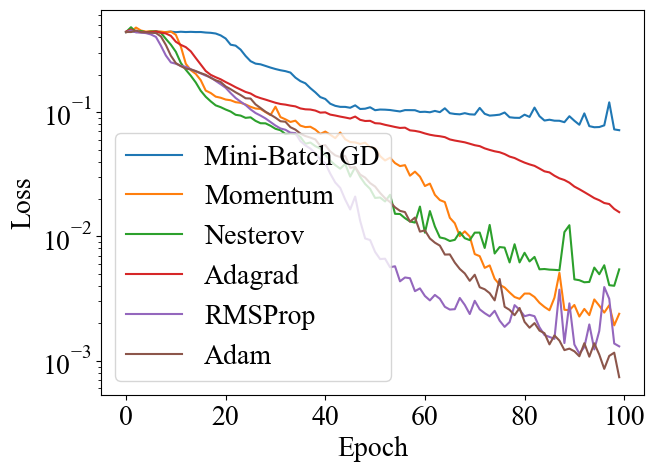

In [5]:
# We will make a network that maps 2 inputs (x,y) to 1 output (sin(x^2-y^2))

# We will use different optimizers to compare their efficiency 

np.random.seed(42) # Fix the random seed for numpy
kr.utils.set_random_seed(42) # Fix the random seed for Keras

# Step 1: obtain datasets

N_points_data = 100

x_mesh_data = np.reshape(np.linspace(-2,2,N_points_data),(N_points_data,1))
y_mesh_data = np.reshape(np.linspace(-2,2,N_points_data),(N_points_data,1))

input_data = np.zeros((N_points_data**2,2))
output_data = np.zeros((N_points_data**2,1))

input_data_rand = np.zeros((N_points_data**2,2))
output_data_rand = np.zeros((N_points_data**2,1))

for i in range(N_points_data):
    
    for j in range(N_points_data):
        
        input_data[i*N_points_data+j] = x_mesh_data[i],y_mesh_data[j]
        output_data[i*N_points_data+j] = np.sin(x_mesh_data[i]**2-y_mesh_data[j]**2)
        
random_index = np.linspace(0,N_points_data**2-1,N_points_data**2)
np.random.shuffle(random_index)

for i in range(N_points_data):
    
    for j in range(N_points_data):
        
        index_rand = int(random_index[i*N_points_data+j])
        
        input_data_rand[i*N_points_data+j] = input_data[index_rand]
        output_data_rand[i*N_points_data+j] = output_data[index_rand]

# Step 2: create the networks, one for each optimizer

# Mini-batch Gradient Descent

input_label_1 = kr.Input((2,))
netl_1 = kr.layers.Dense(50, activation = 'sigmoid')(input_label_1)
netl_1 = kr.layers.Dense(50, activation = 'sigmoid')(netl_1)
netl_1 = kr.layers.Dense(1)(netl_1) # Connected the layers one after the other

net_1 = kr.Model(input_label_1,netl_1) # Create the full network

SGD(net_1,lr=0.1)

# Momentum Optimization

input_label_2 = kr.Input((2,))
netl_2 = kr.layers.Dense(50, activation = 'sigmoid')(input_label_2)
netl_2 = kr.layers.Dense(50, activation = 'sigmoid')(netl_2)
netl_2 = kr.layers.Dense(1)(netl_2) # Connected the layers one after the other

net_2 = kr.Model(input_label_2,netl_2) # Create the full network

Momentum_opt(net_2,lr=0.03)

# Nesterov Accelerated Gradient

input_label_3 = kr.Input((2,))
netl_3 = kr.layers.Dense(50, activation = 'sigmoid')(input_label_3)
netl_3 = kr.layers.Dense(50, activation = 'sigmoid')(netl_3)
netl_3 = kr.layers.Dense(1)(netl_3) # Connected the layers one after the other

net_3 = kr.Model(input_label_3,netl_3) # Create the full network

Nesterov(net_3,lr=0.03)

# Adagrad

input_label_4 = kr.Input((2,))
netl_4 = kr.layers.Dense(50, activation = 'sigmoid')(input_label_4)
netl_4 = kr.layers.Dense(50, activation = 'sigmoid')(netl_4)
netl_4 = kr.layers.Dense(1)(netl_4) # Connected the layers one after the other

net_4 = kr.Model(input_label_4,netl_4) # Create the full network

Adagrad(net_4,lr=0.1)

# RMSProp

input_label_5 = kr.Input((2,))
netl_5 = kr.layers.Dense(50, activation = 'sigmoid')(input_label_5)
netl_5 = kr.layers.Dense(50, activation = 'sigmoid')(netl_5)
netl_5 = kr.layers.Dense(1)(netl_5) # Connected the layers one after the other

net_5 = kr.Model(input_label_5,netl_5) # Create the full network

RMSProp(net_5,lr=0.001)

# Adam

input_label_6 = kr.Input((2,))
netl_6 = kr.layers.Dense(50, activation = 'sigmoid')(input_label_6)
netl_6 = kr.layers.Dense(50, activation = 'sigmoid')(netl_6)
netl_6 = kr.layers.Dense(1)(netl_6) # Connected the layers one after the other

net_6 = kr.Model(input_label_6,netl_6) # Create the full network

Adam(net_6,lr=0.001)

# Step 3: train the networks

batch_size = 32
n_epochs = 100
val_percentage = 0.2

net1 = net_1.fit(input_data_rand,output_data_rand,batch_size=batch_size, validation_split=val_percentage, epochs=n_epochs, verbose = 0)
loss_1 = net1.history['loss'] #recording of loss
val_loss_1 = net1.history['val_loss'] #recording of val_loss

net2 = net_2.fit(input_data_rand,output_data_rand,batch_size=batch_size, validation_split=val_percentage, epochs=n_epochs, verbose = 0)
loss_2 = net2.history['loss'] #recording of loss
val_loss_2 = net2.history['val_loss'] #recording of val_loss

net3 = net_3.fit(input_data_rand,output_data_rand,batch_size=batch_size, validation_split=val_percentage, epochs=n_epochs, verbose = 0)
loss_3 = net3.history['loss'] #recording of loss
val_loss_3 = net3.history['val_loss'] #recording of val_loss

net4 = net_4.fit(input_data_rand,output_data_rand,batch_size=batch_size, validation_split=val_percentage, epochs=n_epochs, verbose = 0)
loss_4 = net4.history['loss'] #recording of loss
val_loss_4 = net4.history['val_loss'] #recording of val_loss

net5 = net_5.fit(input_data_rand,output_data_rand,batch_size=batch_size, validation_split=val_percentage, epochs=n_epochs, verbose = 0)
loss_5 = net5.history['loss'] #recording of loss
val_loss_5 = net5.history['val_loss'] #recording of val_loss

net6 = net_6.fit(input_data_rand,output_data_rand,batch_size=batch_size, validation_split=val_percentage, epochs=n_epochs, verbose = 0)
loss_6 = net6.history['loss'] #recording of loss
val_loss_6 = net6.history['val_loss'] #recording of val_loss

# Step 4: plot the results

plt.rcParams['font.family'] = ['Times New Roman']
fig,axs = plt.subplots(1,1,figsize=(7,5))
axs.plot(val_loss_1)
axs.plot(val_loss_2)
axs.plot(val_loss_3)
axs.plot(val_loss_4)
axs.plot(val_loss_5)
axs.plot(val_loss_6)
axs.set_ylabel('Loss', fontsize = 20)
axs.set_yscale('log')
axs.set_xlabel('Epoch', fontsize = 20)
axs.tick_params(axis='both', labelsize = 20)
axs.legend(['Mini-Batch GD', 'Momentum', 'Nesterov', 'Adagrad', 'RMSProp', 'Adam'], loc='lower left', fontsize = 20)
fig.savefig('DL_compare_optims.png', format='png', dpi=600)
plt.show()

## Learning rate

/tmp/ipykernel_483159/1624524033.py:25: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  input_data[i*N_points_data+j] = x_mesh_data[i],y_mesh_data[j]


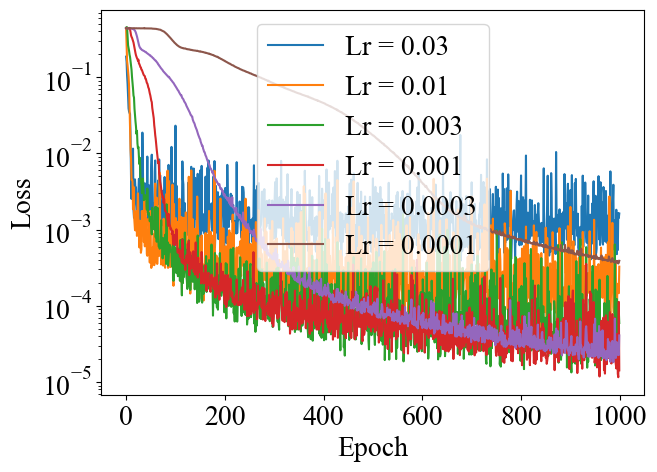

In [4]:
# We will make a network that maps 2 inputs (x,y) to 1 output (sin(x^2-y^2))

# We will use different learning rates to compare their efficiency 

np.random.seed(42) # Fix the random seed for numpy
kr.utils.set_random_seed(42) # Fix the random seed for Keras

# Step 1: obtain datasets

N_points_data = 100

x_mesh_data = np.reshape(np.linspace(-2,2,N_points_data),(N_points_data,1))
y_mesh_data = np.reshape(np.linspace(-2,2,N_points_data),(N_points_data,1))

input_data = np.zeros((N_points_data**2,2))
output_data = np.zeros((N_points_data**2,1))

input_data_rand = np.zeros((N_points_data**2,2))
output_data_rand = np.zeros((N_points_data**2,1))

for i in range(N_points_data):
    
    for j in range(N_points_data):
        
        input_data[i*N_points_data+j] = x_mesh_data[i],y_mesh_data[j]
        output_data[i*N_points_data+j] = np.sin(x_mesh_data[i]**2-y_mesh_data[j]**2)
        
random_index = np.linspace(0,N_points_data**2-1,N_points_data**2)
np.random.shuffle(random_index)

for i in range(N_points_data):
    
    for j in range(N_points_data):
        
        index_rand = int(random_index[i*N_points_data+j])
        
        input_data_rand[i*N_points_data+j] = input_data[index_rand]
        output_data_rand[i*N_points_data+j] = output_data[index_rand]

# Step 2: create the networks, one for each value of the learning rate

lrs = [0.03, 0.01, 0.003, 0.001, 0.0003, 0.0001]

input_label_1 = kr.Input((2,))
netl_1 = kr.layers.Dense(50, activation = 'sigmoid')(input_label_1)
netl_1 = kr.layers.Dense(50, activation = 'sigmoid')(netl_1)
netl_1 = kr.layers.Dense(1)(netl_1) # Connected the layers one after the other

net_1 = kr.Model(input_label_1,netl_1) # Create the full network

opt_1 = tf.keras.optimizers.Adam(learning_rate=lrs[0]) # Choose optimizer

net_1.compile(loss='mean_squared_error', optimizer=opt_1) # Compile the network

input_label_2 = kr.Input((2,))
netl_2 = kr.layers.Dense(50, activation = 'sigmoid')(input_label_2)
netl_2 = kr.layers.Dense(50, activation = 'sigmoid')(netl_2)
netl_2 = kr.layers.Dense(1)(netl_2) # Connected the layers one after the other

net_2 = kr.Model(input_label_2,netl_2) # Create the full network

opt_2 = tf.keras.optimizers.Adam(learning_rate=lrs[1]) # Choose optimizer

net_2.compile(loss='mean_squared_error', optimizer=opt_2) # Compile the network

input_label_3 = kr.Input((2,))
netl_3 = kr.layers.Dense(50, activation = 'sigmoid')(input_label_3)
netl_3 = kr.layers.Dense(50, activation = 'sigmoid')(netl_3)
netl_3 = kr.layers.Dense(1)(netl_3) # Connected the layers one after the other

net_3 = kr.Model(input_label_3,netl_3) # Create the full network

opt_3 = tf.keras.optimizers.Adam(learning_rate=lrs[2]) # Choose optimizer

net_3.compile(loss='mean_squared_error', optimizer=opt_3) # Compile the network

input_label_4 = kr.Input((2,))
netl_4 = kr.layers.Dense(50, activation = 'sigmoid')(input_label_4)
netl_4 = kr.layers.Dense(50, activation = 'sigmoid')(netl_4)
netl_4 = kr.layers.Dense(1)(netl_4) # Connected the layers one after the other

net_4 = kr.Model(input_label_4,netl_4) # Create the full network

opt_4 = tf.keras.optimizers.Adam(learning_rate=lrs[3]) # Choose optimizer

net_4.compile(loss='mean_squared_error', optimizer=opt_4) # Compile the network

input_label_5 = kr.Input((2,))
netl_5 = kr.layers.Dense(50, activation = 'sigmoid')(input_label_5)
netl_5 = kr.layers.Dense(50, activation = 'sigmoid')(netl_5)
netl_5 = kr.layers.Dense(1)(netl_5) # Connected the layers one after the other

net_5 = kr.Model(input_label_5,netl_5) # Create the full network

opt_5 = tf.keras.optimizers.Adam(learning_rate=lrs[4]) # Choose optimizer

net_5.compile(loss='mean_squared_error', optimizer=opt_5) # Compile the network

input_label_6 = kr.Input((2,))
netl_6 = kr.layers.Dense(50, activation = 'sigmoid')(input_label_6)
netl_6 = kr.layers.Dense(50, activation = 'sigmoid')(netl_6)
netl_6 = kr.layers.Dense(1)(netl_6) # Connected the layers one after the other

net_6 = kr.Model(input_label_6,netl_6) # Create the full network

opt_6 = tf.keras.optimizers.Adam(learning_rate=lrs[5]) # Choose optimizer

net_6.compile(loss='mean_squared_error', optimizer=opt_6) # Compile the network

# Step 3: train the networks

batch_size = 32
n_epochs = 1000
val_percentage = 0.2

net1 = net_1.fit(input_data_rand,output_data_rand,batch_size=batch_size, validation_split=val_percentage, epochs=n_epochs, verbose = 0)
loss_1 = net1.history['loss'] #recording of loss
val_loss_1 = net1.history['val_loss'] #recording of val_loss

net2 = net_2.fit(input_data_rand,output_data_rand,batch_size=batch_size, validation_split=val_percentage, epochs=n_epochs, verbose = 0)
loss_2 = net2.history['loss'] #recording of loss
val_loss_2 = net2.history['val_loss'] #recording of val_loss

net3 = net_3.fit(input_data_rand,output_data_rand,batch_size=batch_size, validation_split=val_percentage, epochs=n_epochs, verbose = 0)
loss_3 = net3.history['loss'] #recording of loss
val_loss_3 = net3.history['val_loss'] #recording of val_loss

net4 = net_4.fit(input_data_rand,output_data_rand,batch_size=batch_size, validation_split=val_percentage, epochs=n_epochs, verbose = 0)
loss_4 = net4.history['loss'] #recording of loss
val_loss_4 = net4.history['val_loss'] #recording of val_loss

net5 = net_5.fit(input_data_rand,output_data_rand,batch_size=batch_size, validation_split=val_percentage, epochs=n_epochs, verbose = 0)
loss_5 = net5.history['loss'] #recording of loss
val_loss_5 = net5.history['val_loss'] #recording of val_loss

net6 = net_6.fit(input_data_rand,output_data_rand,batch_size=batch_size, validation_split=val_percentage, epochs=n_epochs, verbose = 0)
loss_6 = net6.history['loss'] #recording of loss
val_loss_6 = net6.history['val_loss'] #recording of val_loss

# Step 4: plot the results

plt.rcParams['font.family'] = ['Times New Roman']
fig,axs = plt.subplots(1,1,figsize=(7,5))
axs.plot(val_loss_1)
axs.plot(val_loss_2)
axs.plot(val_loss_3)
axs.plot(val_loss_4)
axs.plot(val_loss_5)
axs.plot(val_loss_6)
axs.set_ylabel('Loss', fontsize = 20)
axs.set_yscale('log')
axs.set_xlabel('Epoch', fontsize = 20)
axs.tick_params(axis='both', labelsize = 20)
axs.legend(['Lr = 0.03', 'Lr = 0.01', 'Lr = 0.003', 'Lr = 0.001', 'Lr = 0.0003', 'Lr = 0.0001'], loc='upper center', fontsize = 20)
fig.savefig('DL_simple_lr_1000.png', format='png', dpi=600)
plt.show()

## Epochs

/tmp/ipykernel_7261/1634786443.py:25: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  input_data[i*N_points_data+j] = x_mesh_data[i],y_mesh_data[j]
2024-05-24 09:53:41.683198: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


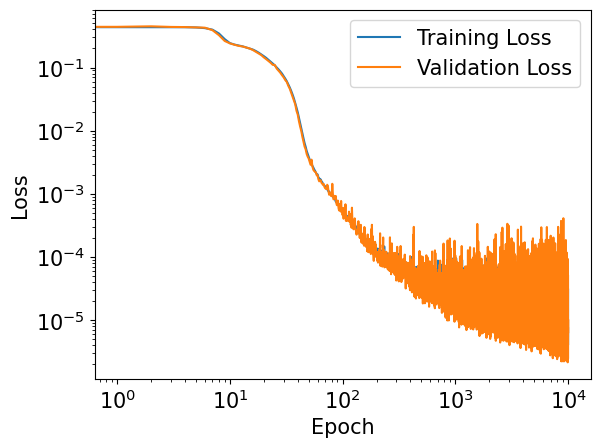

In [2]:
# We will make a network that maps 2 inputs (x,y) to 1 output (sin(x^2-y^2))

# We will see evolution with the number of epochs

np.random.seed(42) # Fix the random seed for numpy
kr.utils.set_random_seed(42) # Fix the random seed for Keras

# Step 1: obtain datasets

N_points_data = 100

x_mesh_data = np.reshape(np.linspace(-2,2,N_points_data),(N_points_data,1))
y_mesh_data = np.reshape(np.linspace(-2,2,N_points_data),(N_points_data,1))

input_data = np.zeros((N_points_data**2,2))
output_data = np.zeros((N_points_data**2,1))

input_data_rand = np.zeros((N_points_data**2,2))
output_data_rand = np.zeros((N_points_data**2,1))

for i in range(N_points_data):
    
    for j in range(N_points_data):
        
        input_data[i*N_points_data+j] = x_mesh_data[i],y_mesh_data[j]
        output_data[i*N_points_data+j] = np.sin(x_mesh_data[i]**2-y_mesh_data[j]**2)
        
random_index = np.linspace(0,N_points_data**2-1,N_points_data**2)
np.random.shuffle(random_index)

for i in range(N_points_data):
    
    for j in range(N_points_data):
        
        index_rand = int(random_index[i*N_points_data+j])
        
        input_data_rand[i*N_points_data+j] = input_data[index_rand]
        output_data_rand[i*N_points_data+j] = output_data[index_rand]

# Step 2: create the network

input_label = kr.Input((2,))
netl = kr.layers.Dense(50, activation = 'sigmoid')(input_label)
netl = kr.layers.Dense(50, activation = 'sigmoid')(netl)
netl = kr.layers.Dense(1)(netl) # Connected the layers one after the other

net = kr.Model(input_label,netl) # Create the full network

opt = tf.keras.optimizers.Adam(learning_rate=0.001) # Choose optimizer

net.compile(loss='mean_squared_error', optimizer=opt) # Compile the network

# Step 3: train the networks

batch_size = 32
n_epochs = 10000
val_percentage = 0.2

net1 = net.fit(input_data_rand,output_data_rand,batch_size=batch_size, validation_split=val_percentage, epochs=n_epochs, verbose = 0)
loss = net1.history['loss'] #recording of loss
val_loss = net1.history['val_loss'] #recording of val_loss

# Step 4: plot the results

plt.rcParams['font.family'] = ['Times New Roman']
fig,axs = plt.subplots(1,1,figsize=(7,5))
axs.plot(loss)
axs.plot(val_loss)
axs.set_ylabel('Loss', fontsize = 20)
axs.set_yscale('log')
axs.set_xlabel('Epoch', fontsize = 20)
axs.set_xscale('log')
axs.tick_params(axis='both', labelsize = 20)
#fig.savefig('DL_compare_epochs.png', format='png', dpi=600)
plt.show()

## Batch Size

/tmp/ipykernel_138745/435441268.py:25: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  input_data[i*N_points_data+j] = x_mesh_data[i],y_mesh_data[j]


--- 45.19706678390503 seconds ---
--- 32.655046224594116 seconds ---
--- 35.50743842124939 seconds ---
--- 54.068169355392456 seconds ---
--- 95.27925062179565 seconds ---
--- 974.7122914791107 seconds ---


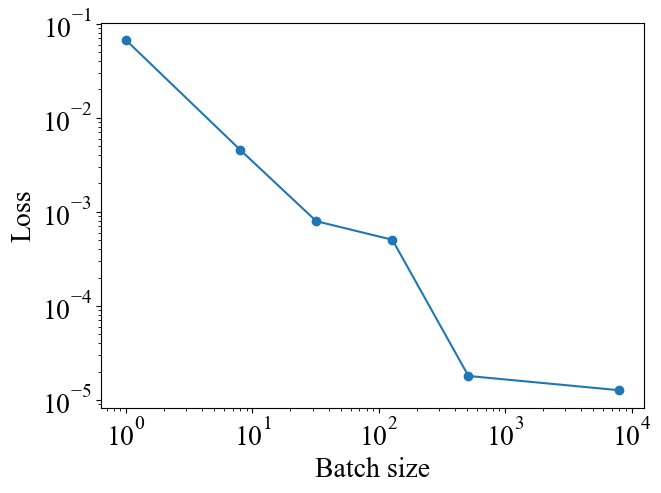

In [6]:
# We will make a network that maps 2 inputs (x,y) to 1 output (sin(x^2-y^2))

# We will use different batch sizes to compare their efficiency 

np.random.seed(42) # Fix the random seed for numpy
kr.utils.set_random_seed(42) # Fix the random seed for Keras

# Step 1: obtain datasets

N_points_data = 100

x_mesh_data = np.reshape(np.linspace(-2,2,N_points_data),(N_points_data,1))
y_mesh_data = np.reshape(np.linspace(-2,2,N_points_data),(N_points_data,1))

input_data = np.zeros((N_points_data**2,2))
output_data = np.zeros((N_points_data**2,1))

input_data_rand = np.zeros((N_points_data**2,2))
output_data_rand = np.zeros((N_points_data**2,1))

for i in range(N_points_data):
    
    for j in range(N_points_data):
        
        input_data[i*N_points_data+j] = x_mesh_data[i],y_mesh_data[j]
        output_data[i*N_points_data+j] = np.sin(x_mesh_data[i]**2-y_mesh_data[j]**2)
        
random_index = np.linspace(0,N_points_data**2-1,N_points_data**2)
np.random.shuffle(random_index)

for i in range(N_points_data):
    
    for j in range(N_points_data):
        
        index_rand = int(random_index[i*N_points_data+j])
        
        input_data_rand[i*N_points_data+j] = input_data[index_rand]
        output_data_rand[i*N_points_data+j] = output_data[index_rand]

# Step 2: create the networks, one for each value of the batch size

input_label_1 = kr.Input((2,))
netl_1 = kr.layers.Dense(50, activation = 'sigmoid')(input_label_1)
netl_1 = kr.layers.Dense(50, activation = 'sigmoid')(netl_1)
netl_1 = kr.layers.Dense(1)(netl_1) # Connected the layers one after the other

net_1 = kr.Model(input_label_1,netl_1) # Create the full network

opt_1 = tf.keras.optimizers.Adam(learning_rate=0.001) # Choose optimizer

net_1.compile(loss='mean_squared_error', optimizer=opt_1) # Compile the network

input_label_2 = kr.Input((2,))
netl_2 = kr.layers.Dense(50, activation = 'sigmoid')(input_label_2)
netl_2 = kr.layers.Dense(50, activation = 'sigmoid')(netl_2)
netl_2 = kr.layers.Dense(1)(netl_2) # Connected the layers one after the other

net_2 = kr.Model(input_label_2,netl_2) # Create the full network

opt_2 = tf.keras.optimizers.Adam(learning_rate=0.001) # Choose optimizer

net_2.compile(loss='mean_squared_error', optimizer=opt_2) # Compile the network

input_label_3 = kr.Input((2,))
netl_3 = kr.layers.Dense(50, activation = 'sigmoid')(input_label_3)
netl_3 = kr.layers.Dense(50, activation = 'sigmoid')(netl_3)
netl_3 = kr.layers.Dense(1)(netl_3) # Connected the layers one after the other

net_3 = kr.Model(input_label_3,netl_3) # Create the full network

opt_3 = tf.keras.optimizers.Adam(learning_rate=0.001) # Choose optimizer

net_3.compile(loss='mean_squared_error', optimizer=opt_3) # Compile the network

input_label_4 = kr.Input((2,))
netl_4 = kr.layers.Dense(50, activation = 'sigmoid')(input_label_4)
netl_4 = kr.layers.Dense(50, activation = 'sigmoid')(netl_4)
netl_4 = kr.layers.Dense(1)(netl_4) # Connected the layers one after the other

net_4 = kr.Model(input_label_4,netl_4) # Create the full network

opt_4 = tf.keras.optimizers.Adam(learning_rate=0.001) # Choose optimizer

net_4.compile(loss='mean_squared_error', optimizer=opt_4) # Compile the network

input_label_5 = kr.Input((2,))
netl_5 = kr.layers.Dense(50, activation = 'sigmoid')(input_label_5)
netl_5 = kr.layers.Dense(50, activation = 'sigmoid')(netl_5)
netl_5 = kr.layers.Dense(1)(netl_5) # Connected the layers one after the other

net_5 = kr.Model(input_label_5,netl_5) # Create the full network

opt_5 = tf.keras.optimizers.Adam(learning_rate=0.001) # Choose optimizer

net_5.compile(loss='mean_squared_error', optimizer=opt_5) # Compile the network

input_label_6 = kr.Input((2,))
netl_6 = kr.layers.Dense(50, activation = 'sigmoid')(input_label_6)
netl_6 = kr.layers.Dense(50, activation = 'sigmoid')(netl_6)
netl_6 = kr.layers.Dense(1)(netl_6) # Connected the layers one after the other

net_6 = kr.Model(input_label_6,netl_6) # Create the full network

opt_6 = tf.keras.optimizers.Adam(learning_rate=0.001) # Choose optimizer

net_6.compile(loss='mean_squared_error', optimizer=opt_6) # Compile the network

# Step 3: train the networks

batch_sizes = [1,8,32,128,512,8000]
n_epochss = [4,25,100,400,1600,25000]
val_percentage = 0.2

import time
start_time = time.time()

net1 = net_1.fit(input_data_rand,output_data_rand,batch_size=batch_sizes[0], validation_split=val_percentage, epochs=n_epochss[0], verbose = 0)
loss_1 = net1.history['loss'] #recording of loss
val_loss_1 = net1.history['val_loss'] #recording of val_loss

print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()

net2 = net_2.fit(input_data_rand,output_data_rand,batch_size=batch_sizes[1], validation_split=val_percentage, epochs=n_epochss[1], verbose = 0)
loss_2 = net2.history['loss'] #recording of loss
val_loss_2 = net2.history['val_loss'] #recording of val_loss

print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()

net3 = net_3.fit(input_data_rand,output_data_rand,batch_size=batch_sizes[2], validation_split=val_percentage, epochs=n_epochss[2], verbose = 0)
loss_3 = net3.history['loss'] #recording of loss
val_loss_3 = net3.history['val_loss'] #recording of val_loss

print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()

net4 = net_4.fit(input_data_rand,output_data_rand,batch_size=batch_sizes[3], validation_split=val_percentage, epochs=n_epochss[3], verbose = 0)
loss_4 = net4.history['loss'] #recording of loss
val_loss_4 = net4.history['val_loss'] #recording of val_loss

print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()

net5 = net_5.fit(input_data_rand,output_data_rand,batch_size=batch_sizes[4], validation_split=val_percentage, epochs=n_epochss[4], verbose = 0)
loss_5 = net5.history['loss'] #recording of loss
val_loss_5 = net5.history['val_loss'] #recording of val_loss

print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()

net6 = net_6.fit(input_data_rand,output_data_rand,batch_size=batch_sizes[5], validation_split=val_percentage, epochs=n_epochss[5], verbose = 0)
loss_6 = net6.history['loss'] #recording of loss
val_loss_6 = net6.history['val_loss'] #recording of val_loss

print("--- %s seconds ---" % (time.time() - start_time))

# Step 4: plot the results

x = [1,8,32,128,512,8000]
y = [val_loss_1[-1],val_loss_2[-1],val_loss_3[-1],val_loss_4[-1],val_loss_5[-1],val_loss_6[-1]]

plt.rcParams['font.family'] = ['Times New Roman']
fig,axs = plt.subplots(1,1,figsize=(7,5))
axs.plot(x,y,marker='o')
axs.set_ylabel('Loss', fontsize = 20)
axs.set_yscale('log')
axs.set_xlabel('Batch size', fontsize = 20)
axs.set_xscale('log')
axs.tick_params(axis='both', labelsize = 20)
fig.savefig('DL_compare_batches.png', format='png', dpi=600)
plt.show()

In [ ]:
--- 82.13878345489502 seconds ---
--- 32.61013102531433 seconds ---
--- 37.952038049697876 seconds ---
--- 50.79200625419617 seconds ---
--- 75.08066773414612 seconds ---
--- 1025.355963230133 seconds ---

## Regularization

In [ ]:
# Overfitting and underfitting, from SciKit Learn documentation
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()